<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_356473029_0_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
# lc_0.csv is made for slected sectors or specifically made for this one
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.005)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 356473029
period = 2.61586316661658  # Orbital period in days
epoch = 1843.21830236196
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.2]
folded_lc = folded_lc[folded_lc.time > -0.2]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_356473029_all_sector_lightcurve.csv


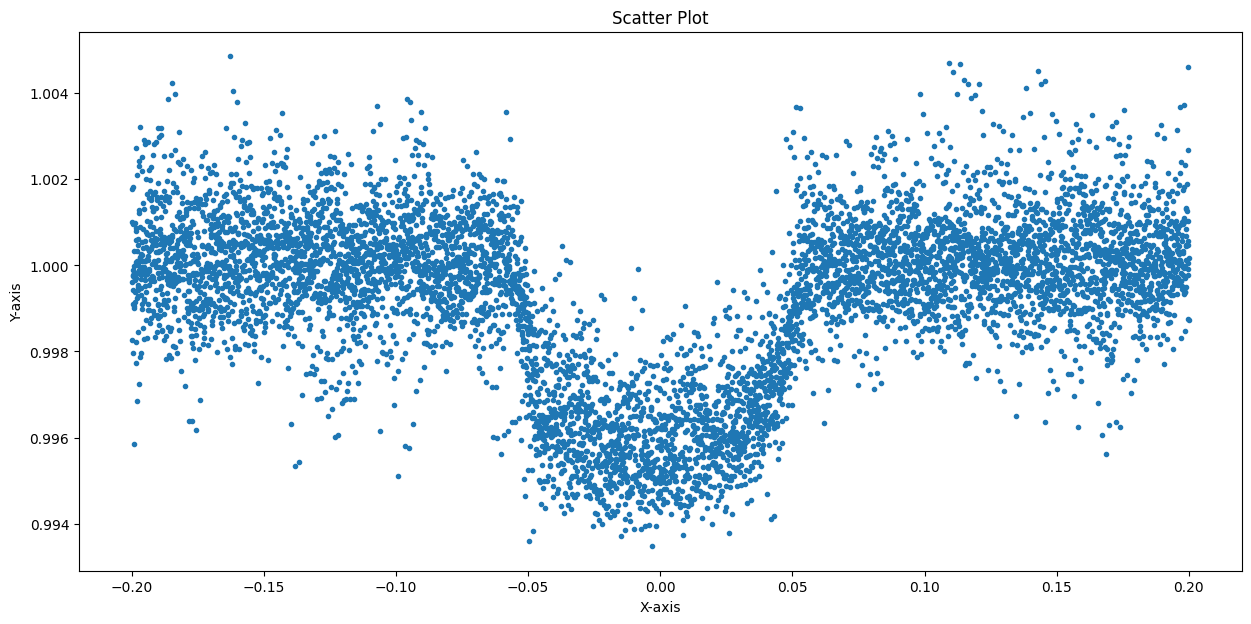

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [6]:
ID = tic_id
sectors = np.array([20, 47, 60])
target = tr.target(ID=ID, sectors=sectors) # target radius shorted

<ipython-input-7-4b79ec4aa959>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_20, ap_47, ap_60])


Sector 20


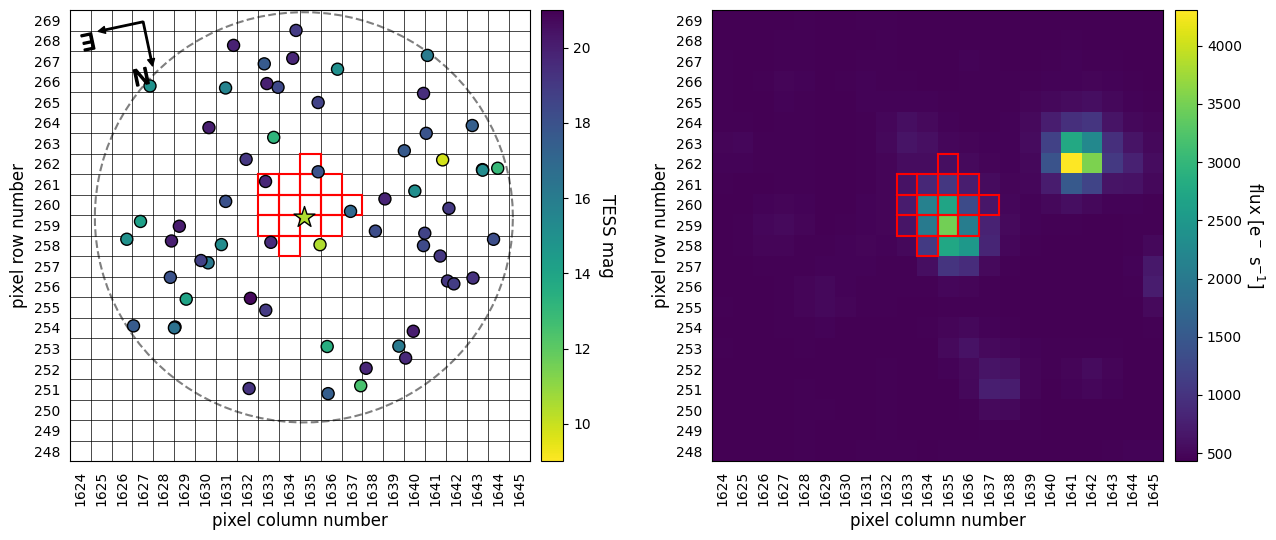

Sector 47


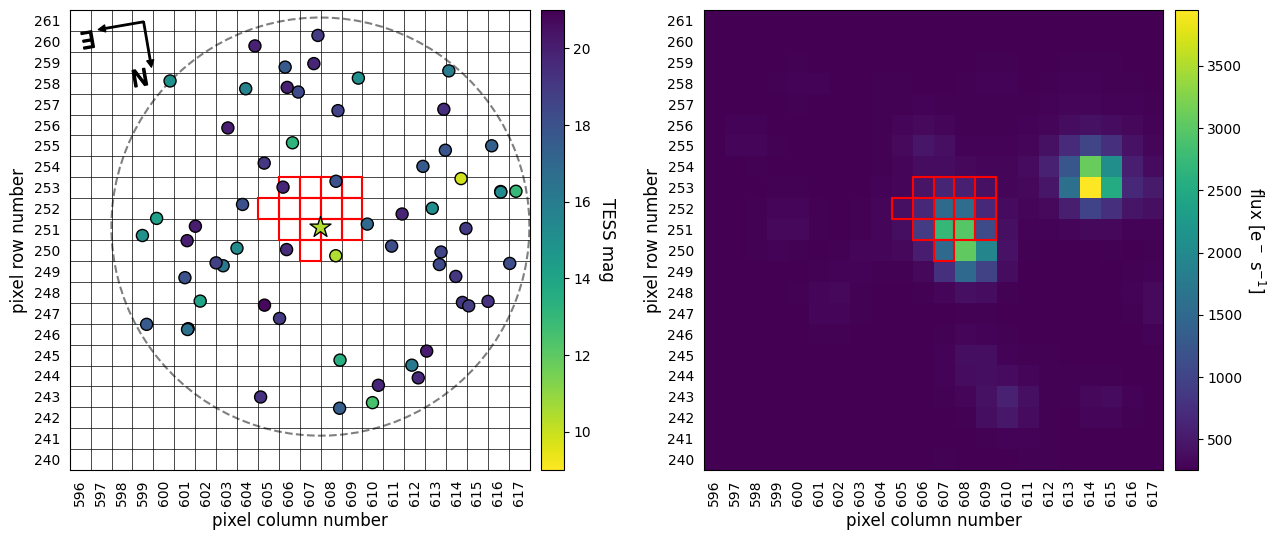

Sector 60


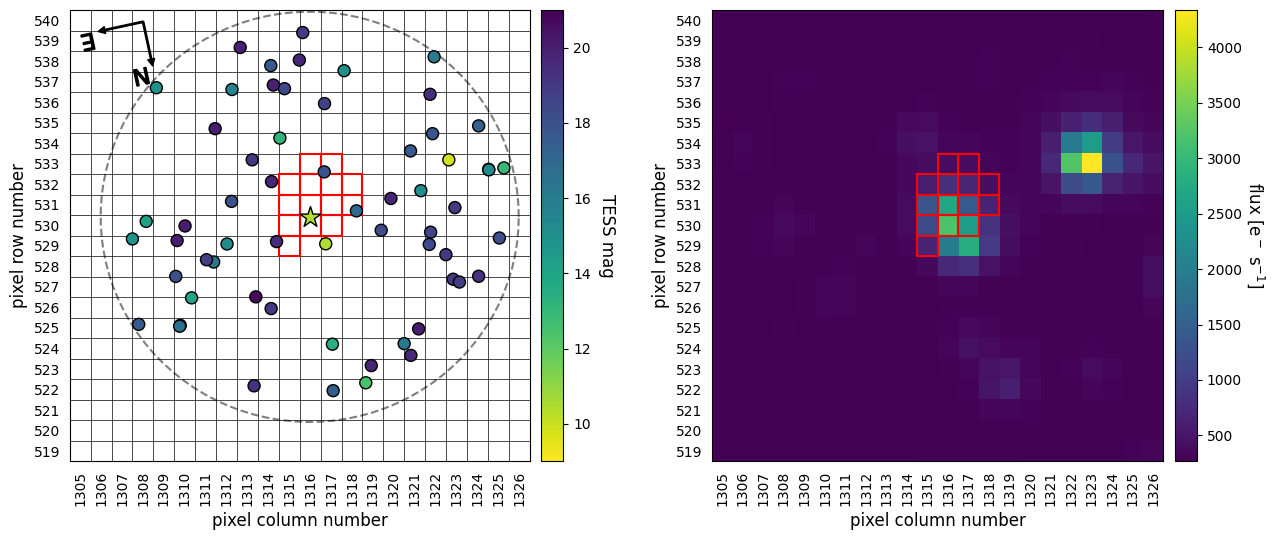

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,356473029,10.4164,9.742,9.371,9.272,117.031173,50.217572,0.97700,0.963050,5547.0,6.576550,0.000,0.000
1,356473034,10.4467,9.744,9.340,9.308,117.026969,50.225811,0.90200,1.084950,5267.0,6.453950,31.203,341.925
2,741714560,19.5158,NaN,NaN,NaN,117.047142,50.222010,NaN,NaN,NaN,1.279560,40.106,66.515
3,356473021,17.9700,16.476,15.925,15.476,117.021093,50.206532,0.62000,0.535128,3998.0,0.666023,46.030,210.301
4,356473031,16.9737,16.226,15.531,15.858,117.011269,50.219024,0.97000,0.609096,5510.0,0.404726,46.146,276.514
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,356473039,18.1520,16.402,15.971,15.048,116.954475,50.235561,NaN,NaN,NaN,NaN,188.141,290.164
58,356473028,12.9526,12.095,11.578,11.488,116.946292,50.217155,0.82000,0.720390,4975.0,3.444500,195.532,269.593
59,458387106,17.5907,16.373,15.462,15.475,117.111757,50.235072,0.64000,0.453750,4108.0,1.015410,195.998,71.219
60,356473012,16.0448,15.257,14.788,14.762,116.965191,50.182984,0.89000,0.927638,5214.0,0.549386,196.524,230.711


In [7]:
ap_20 = np.array([[1633.0, 259.0], [1633.0, 260.0], [1633.0, 261.0], [1634.0, 258.0],
      [1634.0, 259.0], [1634.0, 260.0], [1634.0, 261.0], [1635.0, 259.0], [1635.0,
        260.0], [1635.0, 261.0], [1635.0, 262.0], [1636.0, 259.0], [1636.0, 260.0],
      [1636.0, 261.0], [1637.0, 260.0]])
ap_47 = np.array([[605.0, 252.0], [606.0, 251.0], [606.0,
        252.0], [606.0, 253.0], [607.0, 250.0], [607.0, 251.0], [607.0, 252.0], [
        607.0, 253.0], [608.0, 251.0], [608.0, 252.0], [608.0, 253.0], [609.0, 251.0],
      [609.0, 252.0], [609.0, 253.0]])
ap_60 = np.array([[1315.0, 529.0], [1315.0, 530.0], [1315.0,
        531.0], [1315.0, 532.0], [1316.0, 530.0], [1316.0, 531.0], [1316.0, 532.0],
      [1316.0, 533.0], [1317.0, 530.0], [1317.0, 531.0], [1317.0, 532.0], [1317.0,
        533.0], [1318.0, 531.0], [1318.0, 532.0]])

apertures = np.array([ap_20, ap_47, ap_60])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [8]:
tdepth = 4.0403 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,356473029,10.4164,9.742,9.371,9.272,117.031173,50.217572,0.97700,0.963050,5547.0,6.576550,0.000,0.000,7.715791e-01,0.005236
1,356473034,10.4467,9.744,9.340,9.308,117.026969,50.225811,0.90200,1.084950,5267.0,6.453950,31.203,341.925,2.257896e-01,0.017894
2,741714560,19.5158,NaN,NaN,NaN,117.047142,50.222010,NaN,NaN,NaN,1.279560,40.106,66.515,6.702184e-05,0.000000
3,356473021,17.9700,16.476,15.925,15.476,117.021093,50.206532,0.62000,0.535128,3998.0,0.666023,46.030,210.301,5.426690e-04,0.000000
4,356473031,16.9737,16.226,15.531,15.858,117.011269,50.219024,0.97000,0.609096,5510.0,0.404726,46.146,276.514,8.615006e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,356473039,18.1520,16.402,15.971,15.048,116.954475,50.235561,NaN,NaN,NaN,NaN,188.141,290.164,4.019725e-22,0.000000
58,356473028,12.9526,12.095,11.578,11.488,116.946292,50.217155,0.82000,0.720390,4975.0,3.444500,195.532,269.593,4.331606e-21,0.000000
59,458387106,17.5907,16.373,15.462,15.475,117.111757,50.235072,0.64000,0.453750,4108.0,1.015410,195.998,71.219,4.118421e-27,0.000000
60,356473012,16.0448,15.257,14.788,14.762,116.965191,50.182984,0.89000,0.927638,5214.0,0.549386,196.524,230.711,6.728939e-22,0.000000


In [9]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating TP scenario probabilitiey for 356473029.
Calculating EB and EBx2P scenario probabilities for 356473029.
Calculating PTP scenario probability for 356473029.
Calculating PEB and PEBx2P scenario probabilities for 356473029.
Calculating STP scenario probability for 356473029.
Calculating SEB and SEBx2P scenario probabilities for 356473029.
Calculating DTP scenario probability for 356473029.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating DEB and DEBx2P scenario probabilities for 356473029.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BTP scenario probability for 356473029.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]


Calculating BEB and BEBx2P scenario probabilities for 356473029.


/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:335: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(trilegal_fname)[:-2]
/usr/local/lib/python3.10/dist-packages/triceratops/funcs.py:312: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = read_csv(output_url, delim_whitespace=True)


Calculating NTP, NEB, and NEB2xP scenario probabilities for 356473034.
CPU times: user 4min 19s, sys: 3.59 s, total: 4min 22s
Wall time: 3min 8s


In [10]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 1.622e-05
NFPP = 1.621e-05


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,356473029,TP,0.977000,0.963050,2.615863,85.651297,0.241559,0.641387,125.677998,7.398856,0.000000,0.000000,9.977314e-01
1,356473029,EB,0.977000,0.963050,2.615863,78.153199,1.698149,0.203191,64.525107,0.000000,0.887485,0.921294,0.000000e+00
2,356473029,EBx2P,0.977000,0.963050,5.231726,85.971767,0.640072,0.647195,176.234634,0.000000,0.935135,0.963050,5.713126e-94
3,356473029,PTP,0.977000,0.963050,2.615863,86.166429,0.397147,0.385493,152.186206,7.483568,0.000000,0.000000,2.228505e-03
4,356473029,PEB,0.977000,0.963050,2.615863,78.957917,1.841619,0.093485,35.694983,0.000000,0.897669,0.934309,0.000000e+00
5,356473029,PEBx2P,0.977000,0.963050,5.231726,85.808801,0.696666,0.601625,170.339639,0.000000,0.971429,0.963050,3.318555e-73
6,356473029,STP,0.915056,0.957417,2.615863,88.882532,0.138137,0.127387,100.624705,10.587881,0.000000,0.000000,9.060379e-10
7,356473029,SEB,0.835940,0.862506,2.615863,89.585072,0.065274,0.001635,165.343564,0.000000,0.086543,0.100000,1.336374e-65
8,356473029,SEBx2P,0.493655,0.495562,5.231726,87.782759,0.880625,0.476780,196.502185,0.000000,0.491984,0.493627,1.460523e-75
9,356473029,DTP,0.977000,0.963050,2.615863,86.681268,0.314356,0.377730,127.507129,7.159615,0.000000,0.000000,2.385092e-05


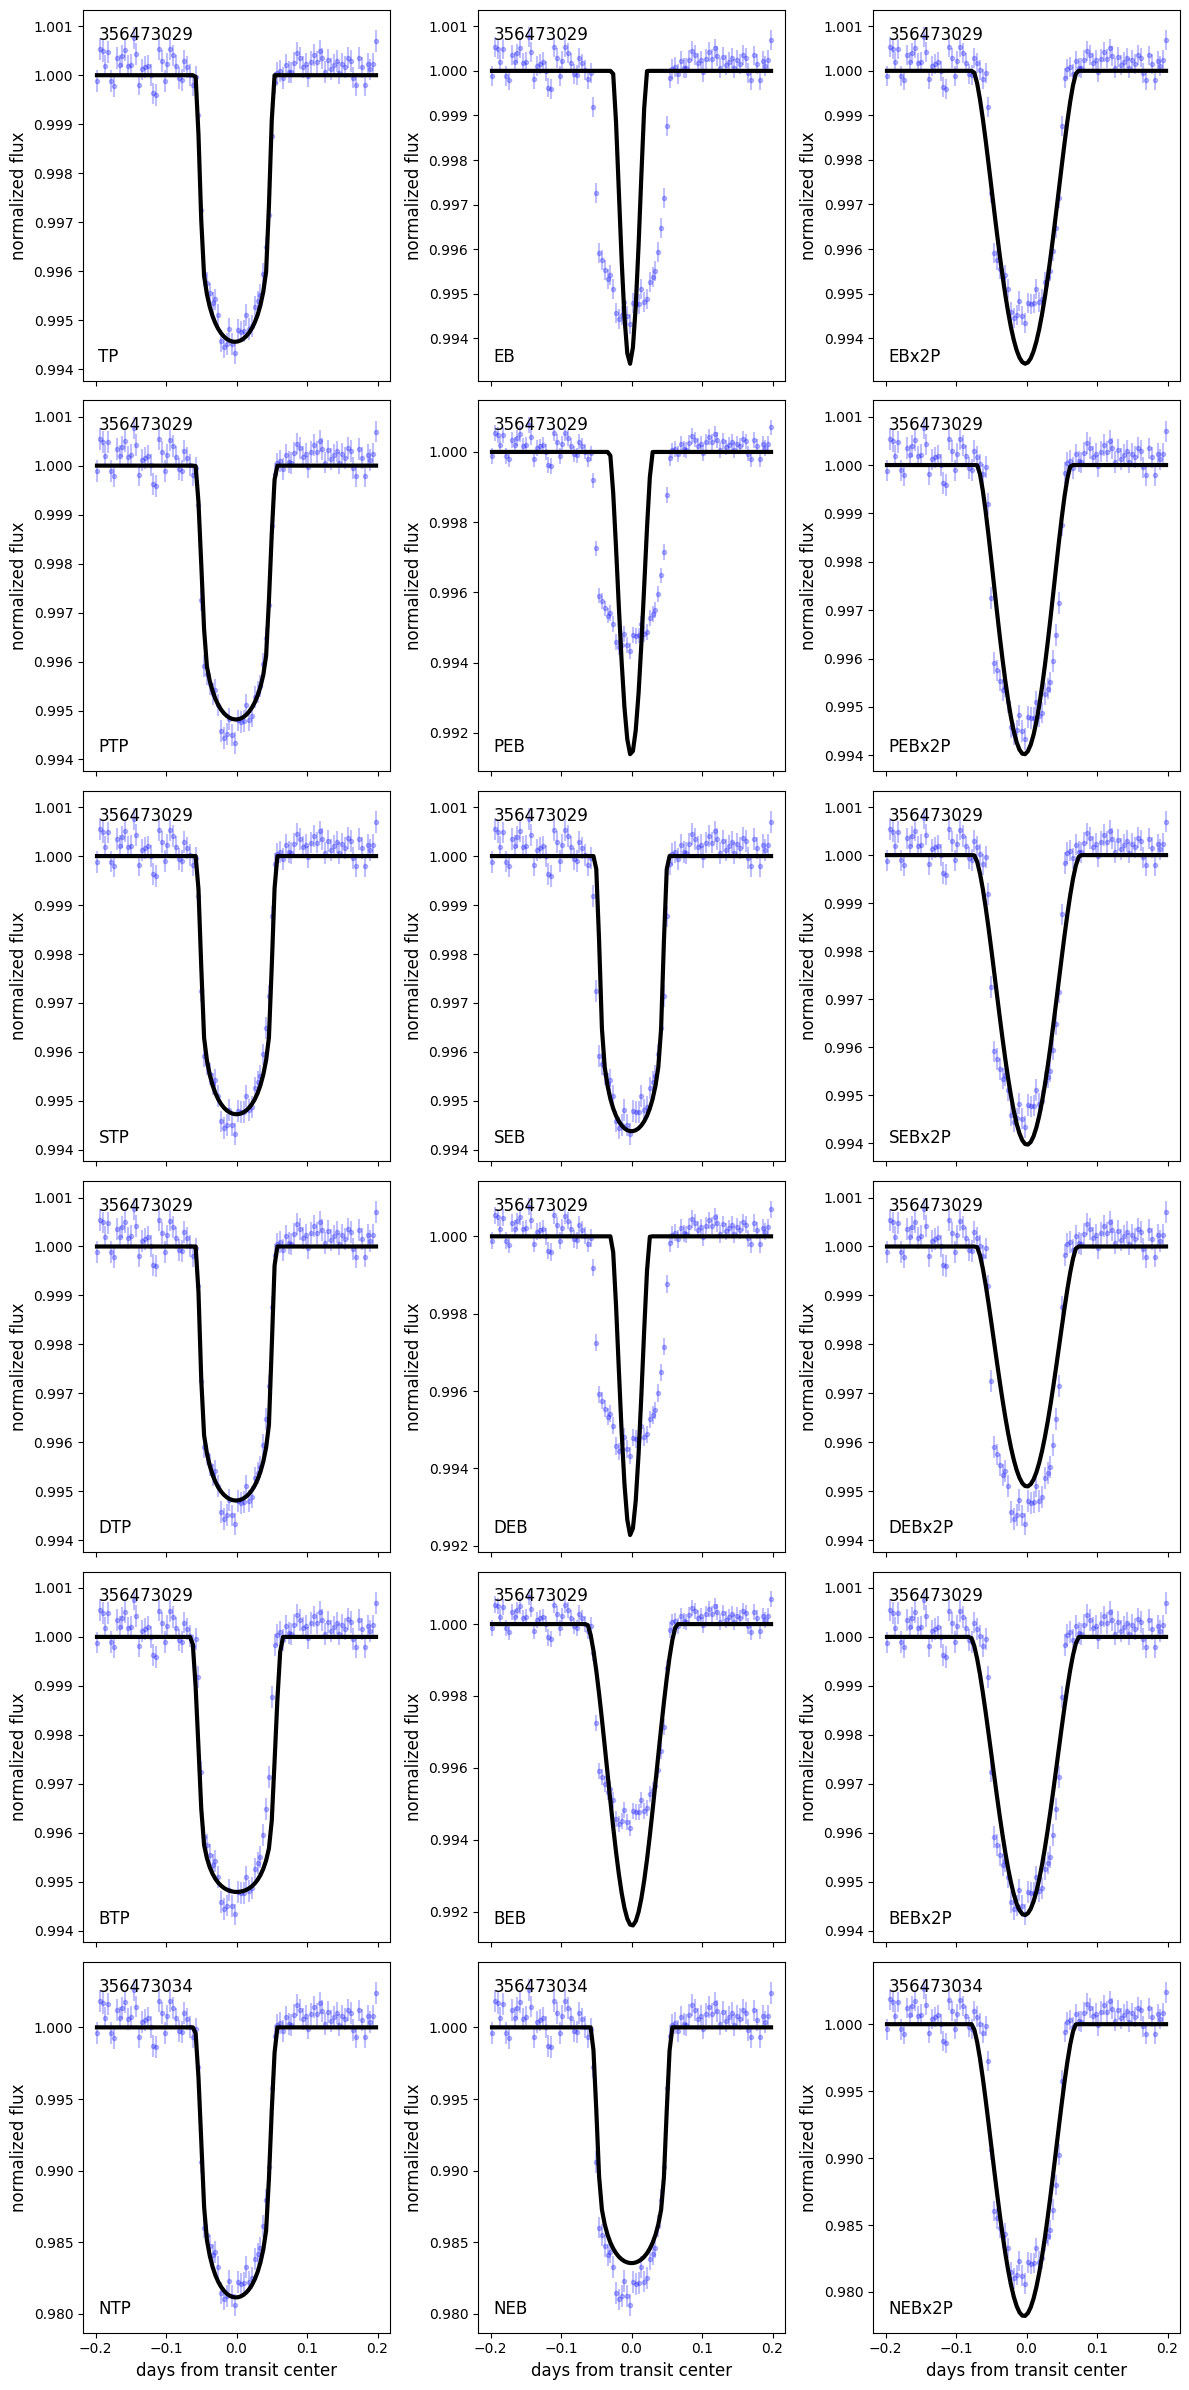

In [11]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.16892932958365495 +/- 0.30105310286329984
NFPP = 0.1634652797353635 +/- 0.30194339379918184
CPU times: user 1h 18min 38s, sys: 1min 9s, total: 1h 19min 48s
Wall time: 53min 7s


Our final conclusion about this specified planet of TIC 356473029 is that it is nearby false positive (according to the range of FPP and NFPP set by TRICERATOPS).